In [9]:
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input



In [10]:
IMAGE_SIZE = (128, 128)



In [11]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [13]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, IMAGE_SIZE)
            images.append(img)
            labels.append(label)
    return images, labels

# Load each category
thread_images, thread_labels = load_images_from_folder("C:\\Users\\kipal\\Downloads\\Thread art", "thread_art")
pencil_images, pencil_labels = load_images_from_folder("C:\\Users\\kipal\\Downloads\\Pencils", "pencil_drawings")
painting_images, painting_labels = load_images_from_folder("C:\\Users\\kipal\\Downloads\\Paintings", "paintings")


In [14]:
X = np.array(thread_images + pencil_images + painting_images)
y = np.array(thread_labels + pencil_labels + painting_labels)

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(128, 128, 3)), 
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: thread_art, pencil_drawings, paintings
])

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [18]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=20
)


C:\Users\kipal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.3636 - loss: 1.0893 - val_accuracy: 0.3333 - val_loss: 646.1683
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.6364 - loss: 1.6320 - val_accuracy: 0.3333 - val_loss: 171.7912
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.5455 - loss: 0.8267 - val_accuracy: 0.3333 - val_loss: 108.4808
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.2727 - loss: 1.2688 - val_accuracy: 0.6667 - val_loss: 42.9829
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.6364 - loss: 0.9115 - val_accuracy: 0.6667 - val_loss: 50.4769
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.5455 - loss: 0.9139 - val_accuracy: 0.3333 - val_loss: 91.7766
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.6364 - loss: 0.8487 - val_accuracy: 0.3333 - val_loss: 179.8531
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.6364 - loss: 0.7013 - val_accuracy: 0.3333 - v

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.6667 - loss: 87.8069
Test Accuracy: 0.6666666865348816


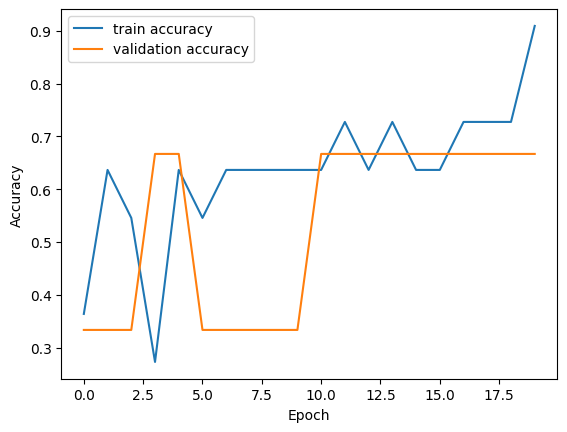

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [26]:
def predict_category(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, IMAGE_SIZE)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    class_label = le.inverse_transform([class_idx])
    return class_label[0]

# Example
predict_category('C:\\Users\\kipal\\Desktop\\Mamba Project\\Mamba project\\pictures\\moonseries4.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


'thread_art'